In [117]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pickle

In [118]:
LIST_OF_STAGE_III_COUNTRIES = pd.read_csv("../../../data/UN/fertility/countries_in_stage_III.csv")
TFR_OF_STAGE_III_COUNTRIES = pd.read_csv("../../../data/UN/fertility/TFR_per_country_stage_III.csv")

MC_SIMULATIONS_PREFIX = "./MC_fertility_"

REGION_OF_INTEREST = "France"
TFR_OF_INTEREST = TFR_OF_STAGE_III_COUNTRIES[TFR_OF_STAGE_III_COUNTRIES["Region"] == REGION_OF_INTEREST]

MC_SIMULATIONS_FILE = MC_SIMULATIONS_PREFIX + REGION_OF_INTEREST + ".pkl"
with open(MC_SIMULATIONS_FILE, "rb") as handle:
    MC_SIMULATIONS = pickle.load(handle)

N_samples = len(MC_SIMULATIONS)
simulation_len = len(MC_SIMULATIONS[0].path) - 1
simulation_start = TFR_OF_INTEREST['Year'].iloc[-1]
simulation_end = simulation_start + simulation_len + 1
simulation_window = np.arange(simulation_start, simulation_end, 1)

MC_SIMULATIONS_path = [MC_SIMULATIONS[i].path[:, 0] for i in np.concatenate([np.arange(9), np.arange(10, N_samples)])] #excluding 9

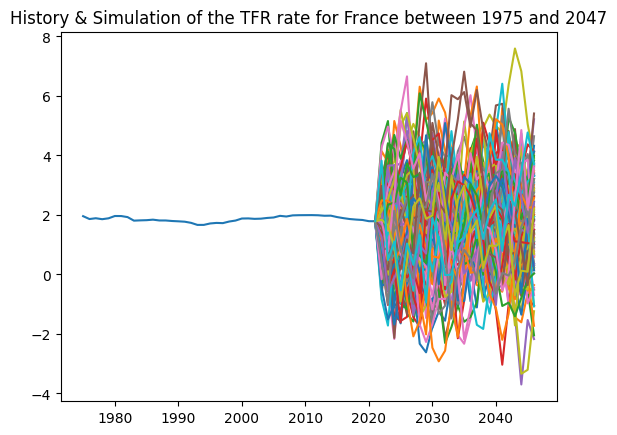

In [119]:
plt.plot(TFR_OF_INTEREST['Year'], TFR_OF_INTEREST['TFR'])
for path in MC_SIMULATIONS_path:
    plt.plot(simulation_window, path[:])
plt.title(
    f"History & Simulation of the TFR rate for {REGION_OF_INTEREST} between {int(TFR_OF_INTEREST['Year'].iloc[0])} and {int(simulation_end)}")
plt.show()

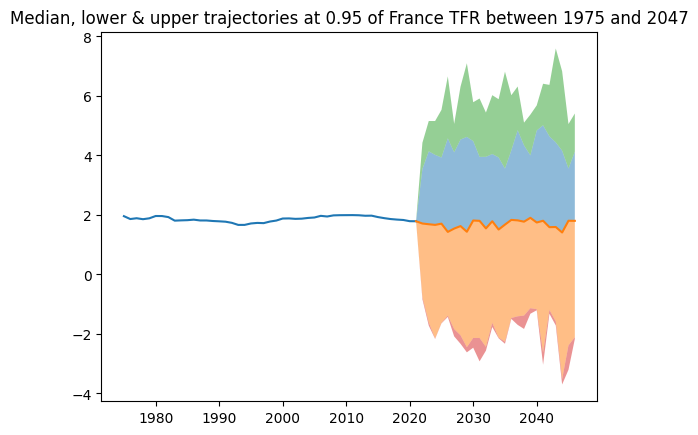

In [120]:
plt.plot(TFR_OF_INTEREST['Year'], TFR_OF_INTEREST['TFR'])
median_trajectory = np.median(MC_SIMULATIONS_path, axis=0)
upper_quantile_95 = np.quantile(MC_SIMULATIONS_path, 0.95, axis=0)
lower_quantile_005 = np.quantile(MC_SIMULATIONS_path, 0.005, axis=0)
best = np.max(MC_SIMULATIONS_path, axis=0)
worst = np.min(MC_SIMULATIONS_path, axis=0)
plt.plot(simulation_window, median_trajectory)
plt.title(
    f"Median, lower & upper trajectories at 0.95 of {REGION_OF_INTEREST} TFR between {int(TFR_OF_INTEREST['Year'].iloc[0])} and {int(simulation_end)}")
plt.fill_between(simulation_window, median_trajectory, upper_quantile_95, alpha=0.5)
plt.fill_between(simulation_window, median_trajectory, lower_quantile_005, alpha=0.5)
plt.fill_between(simulation_window, upper_quantile_95, best, alpha=0.5)
plt.fill_between(simulation_window, lower_quantile_005, worst, alpha=0.5)
plt.show()

In [121]:
lower_quantile_005

array([ 1.78665   , -0.76038517, -1.61844547, -2.15233381, -1.63181027,
       -1.38661284, -1.8389033 , -2.04724035, -2.44928284, -2.13753065,
       -2.13696999, -2.43862548, -1.62757964, -2.12642807, -2.26108506,
       -1.46609828, -1.40991536, -1.38460216, -1.137234  , -1.1693554 ,
       -2.62663013, -1.19500236, -1.58315382, -3.52439395, -2.38726245,
       -2.11221639])

In [122]:
for i in range(N_samples):
    print(i, MC_SIMULATIONS_path[i][-1])

0 3.0167859479226227
1 0.35392884553496184
2 0.91506170311008
3 -2.1737953908333076
4 0.618331967521947
5 3.6286291128610335
6 4.643694221157844
7 3.9256331917373024
8 0.2261460684530937
9 3.403072507434321
10 -0.3599265074638916
11 -2.0481239506585176
12 2.8982852842775415
13 2.8124128643455863
14 0.792111902166722
15 1.814060443138164
16 2.1339956244090694
17 -1.0735395525509657
18 3.72863568366025
19 4.32286340735598
20 3.482171889580229
21 -0.5098844851715059
22 -1.048769637936252
23 0.030786846061247597
24 1.2068576458145805
25 0.7364553390129223
26 2.630381221846829
27 4.063411329594016
28 1.1306512021740376
29 0.35967555196172396
30 0.5957166955127718
31 3.204502768493728
32 2.249725220767005
33 5.214582829625564
34 1.6681259870854541
35 1.641755651468786
36 0.291413286531666
37 -1.238999458111667
38 3.0924206645053873
39 2.4469395289529934
40 -1.7272962953323066
41 1.2500969414823377
42 4.125295998791872
43 3.3313604433338107
44 5.408863600933666
45 -0.6975759759822229
46 2.814

IndexError: list index out of range